# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [201]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
%matplotlib inline

In [202]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


In [203]:
def display_images(batch):

    for index, plotdata in enumerate(batch):
        fig, ax = plt.subplots(nrows = 1, ncols=1)
        rectangle_boxes_list = plotdata['groundtruth_boxes']
        rectangle_boxes_class_list = plotdata['groundtruth_classes']
        plotdata_filename = plotdata['filename'].numpy()
        image_data = plotdata['image']
        img_height = image_data.shape[0]
        img_width = image_data.shape[1]
        ax.imshow(image_data, interpolation='nearest')
        
        # Create a Rectangle patch
        for rectangle, rectangle_class in zip(rectangle_boxes_list, rectangle_boxes_class_list):
            x1 = rectangle[0]*img_width
            y1 = rectangle[1]*img_height
            x2 = rectangle[2]*img_width
            y2 = rectangle[3]*img_height
            length = abs(y2 - y1)
            width = abs(x2 -x1)
            color = 'w'
            text = "Vehicle"
            if rectangle_class == 1:
                color = 'r'
                text = "Vehicle"
            elif rectangle_class == 2:
                color ='g'
                text = "Pedestrian"
            else:
                color = 'b'
                text = "Bicycle"

            rect = patches.Rectangle((y1, x1), length, width, edgecolor=color, facecolor='none')
            # Add the patch to the Axes
            ax.add_patch(rect)
            rx, ry = rect.get_xy()
            cx = rx + rect.get_width()
            cy = ry - 0.1*rect.get_height()
            ax.annotate(text, (cx, cy), color=color, fontsize=8, ha='center', va='center')


        plt.show()
        plt.close(fig)
    
    return 

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

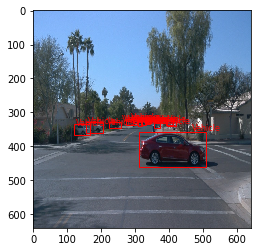

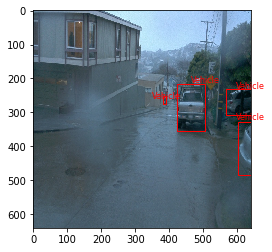

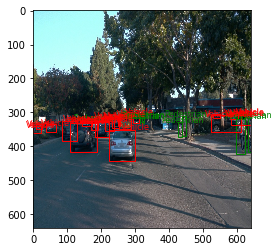

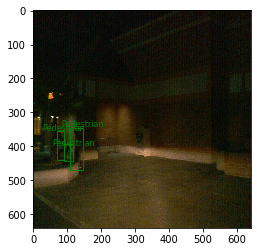

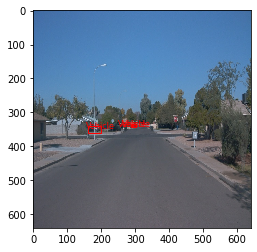

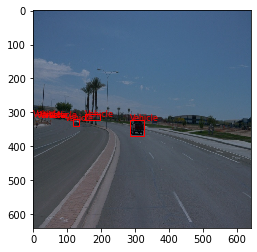

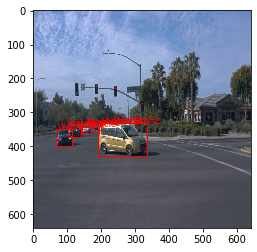

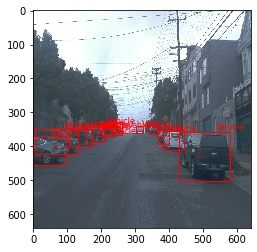

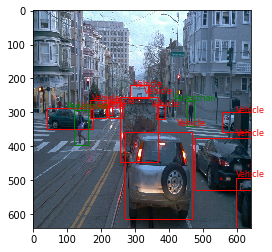

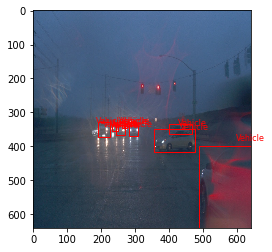

In [204]:
# Display 10 random images in dataset
random_pick=[]
for pick in dataset.take(10):
    random_pick.append(pick)
display_images(random_pick)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [205]:
#display class distribution across dataset
def display_class_distribution_over_dataset(batch):

    fig, ax = plt.subplots(nrows = 1, ncols=1)
    no_of_vehicles_in_dataset = 0
    no_of_pedestrian_in_dataset =0
    no_of_bicyclist_in_dataset = 0
    for index, plotdata in enumerate(batch):  
        rectangle_boxes_class_list = plotdata['groundtruth_classes']
        # get all the class
        for rectangle_class in rectangle_boxes_class_list:
            if rectangle_class == 1:
                no_of_vehicles_in_dataset = no_of_vehicles_in_dataset+1
            elif rectangle_class == 2:
                no_of_pedestrian_in_dataset = no_of_pedestrian_in_dataset+1
            else:
                no_of_bicyclist_in_dataset = no_of_bicyclist_in_dataset+1

    total_objects = no_of_vehicles_in_dataset+no_of_pedestrian_in_dataset+no_of_bicyclist_in_dataset
    class_distribution_over_dataset =[no_of_vehicles_in_dataset/total_objects,
                                                   no_of_pedestrian_in_dataset/total_objects,
                                                  no_of_bicyclist_in_dataset/total_objects]
    ax.bar(["Vechicle","Pedestrian", "Bicyclist"],class_distribution_over_dataset)

    plt.show()
    plt.close(fig)
    
    return class_distribution_over_dataset[0], class_distribution_over_dataset[1], class_distribution_over_dataset[2]

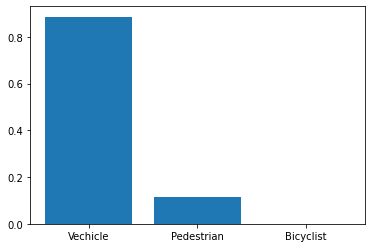

In randomly selected dataset, 88.59649122807018 had vehicles objects,11.403508771929824 had pedestrian objects,  0.0 had bicyclist objects


In [206]:
c1,c2,c3 = display_class_distribution_over_dataset(random_pick)
print("In randomly selected dataset, \
{} had vehicles objects,\
{} had pedestrian objects,  \
{} had bicyclist objects".format(c1*100,c2*100,c3*100))

In [207]:
def display_object_density_over_dataset(batch):

    fig, ax = plt.subplots(nrows = 1, ncols=1)
    #classifying heavyly dense, medium dense , no dense
    object_density_class = ["ZeroObjDensityImages ", "MediumObjDensityImages", "HighObjDensityImages"]
    object_density_distribution_over_dataset  = [0,0,0]
    for index, plotdata in enumerate(batch):  
        rectangle_boxes_class_list = plotdata['groundtruth_classes']
        # get all the class
        size =len(rectangle_boxes_class_list)
        if size == 0:
            object_density_distribution_over_dataset[0] = object_density_distribution_over_dataset[0]+1
        elif size>0 and size <= 5:
            object_density_distribution_over_dataset[1] = object_density_distribution_over_dataset[1]+1
        else:
            object_density_distribution_over_dataset[2] = object_density_distribution_over_dataset[2]+1
    

    ax.bar(object_density_class,object_density_distribution_over_dataset, 0.2)

    plt.show()
    plt.close(fig)
    
    return object_density_distribution_over_dataset[0], object_density_distribution_over_dataset[1], object_density_distribution_over_dataset[2]

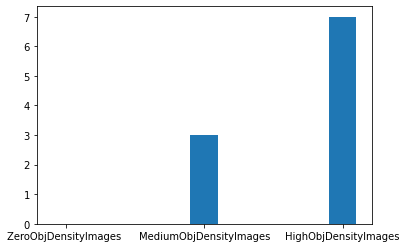

In randomly selected dataset, 0 dataset were on country side drive images,3 dataset were urban highway drive images,  7 dataset were city drive images


In [208]:
c1,c2,c3 = display_object_density_over_dataset(random_pick)
print("In randomly selected dataset, \
{} dataset were on country side drive images,\
{} dataset were urban highway drive images,  \
{} dataset were city drive images".format(c1,c2,c3))

In [209]:
def display_bright_images_count(batch):
    fig, ax = plt.subplots(nrows = 1, ncols=1)
    day_image = 0
    night_image =0
    for index, plotdata in enumerate(batch):
        img = plotdata['image'].numpy()
        R, G, B = img[..., 0]/255, img[..., 1]/255, img[..., 2]/255
        B_list = B.flatten().tolist()
        B_average_in_image = sum(B_list) / len(B_list)
        if B_average_in_image<0.2:
            night_image = night_image+1
        else:
            day_image = day_image+1
            
    ax.bar(["BrightImages", "DarkImages"],[day_image,night_image])

    plt.show()
    plt.close(fig)            
            
    return day_image , night_image

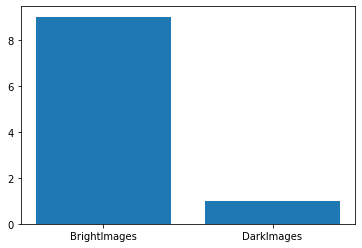

In randomly selected dataset, 9 dataset were bright,1 dataset were dark


In [210]:
c1, c2= display_bright_images_count(random_pick)
print("In randomly selected dataset, \
{} dataset were bright,\
{} dataset were dark".format(c1,c2))